# Homework 3

INSERT YOUR NAME HERE

__Directions:__ Add work to this notebook to solve the problems below.

Be careful to name the objects you create as described in the problem. Some problems may include some tests you can run to test your code.

You must do exact arithemetic unless a problem suggests otherwise!

__References:__ Some problems are derived from problems in the book:
	<ul>
		<li><b>CM:</b> <a href="https://www.sagemath.org/sagebook/english.html"><em>Computational Mathematics with SageMath</em></a> by Paul Zimmermann, Alexandre Casamayou, Nathann Cohen, Guillaume Connan, Thierry Dumont,
Laurent Fousse, François Maltey, Matthias Meulien, Marc Mezzarobba,
Clément Pernet, Nicolas M. Thiéry, Erik Bray, John Cremona, Marcelo Forets, Alexandru Ghitza, and Hugh Thomas. (freely available for download)
    </ul>

## 1. Drawing terms of a recurrent sequence

This is a rephrased version of Problem 13 from *Computational Mathematics with SageMath*.

We consider the sequence $(u_n)_{n \in \mathbb{N}}$ defined by:
$$
\begin{cases}
u_0 = a, \\
\forall n \in \mathbb{N}, \ u_{n+1} = \left| u_n^2 - \frac{1}{4} \right|.
\end{cases}
$$
This sequence depends on the initial value $a \in \mathbb R$.

Write a function `point_sequence(a, N)` which produces the `list` of points (pairs):
$$
\big[(u_0, 0), (u_0, u_1), (u_1, u_1), (u_1, u_2), (u_2, u_2), \dots, (u_N, u_N)\big],
$$
with $u_0=a$ as above. Here $N \geq 1$ is a natural number.

In addition, plot `point_sequence(a, N)` for $a\in \{-0.4, 1.1, 1.3\}$ and $N$ large enough that you can figure out whether $\lim_{n \to +\infty} u_n$ exists and its approximate value if it does. To plot, you could use Sage's [point](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/point.html) or [line](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/line.html).

**Tests for your code:**

In [ ]:
var('a')
assert tuple(point_sequence(a, 1)) == (
    (a, 0), 
    (a, abs(a^2 - 1/4)),
    (abs(a^2 - 1/4), abs(a^2 - 1/4)) 
), f'The value of `point_sequence(a, 1)` is incorrect.'
print('Good job. The value of `point_sequence(a, 1)` is correct.')

In [ ]:
correct_answer = (
    (1, 0),
    (1, 3/4),
    (3/4, 3/4),
    (3/4, 5/16),
    (5/16, 5/16),
    (5/16, 39/256),
    (39/256, 39/256),
)
your_answer = tuple(point_sequence(1, 3))
assert your_answer==correct_answer, f'The value of `point_sequence(1, 3)` is incorrect.'
print('Good job: The value of `point_sequence(1, 3)` is correct.')

## 2. Reachable vertices in a directed graph

A directed graph `g` can be represented as a dictionary whose keys are vertex labels and whose values are lists of vertex labels. There is an directed edge from `v` to `w` if `w` appears in the list `g[v]`.

Call a vertex $z$ *reachable* from $v$ if $z=v$ or if there is a directed path
$$v = w_0 \to w_1 \to w_2 \to \ldots \to w_k = z,$$
where for each $i=0, \ldots, k-1$, there is a directed edge from $w_i$ to $w_{i+1}$.

Write a function `reachable(g, v)` which returns a Python set consisting of all vertices reachable from `v`.

**Tests for your code:**

The dictionary `g0` represents the graph depicted below:

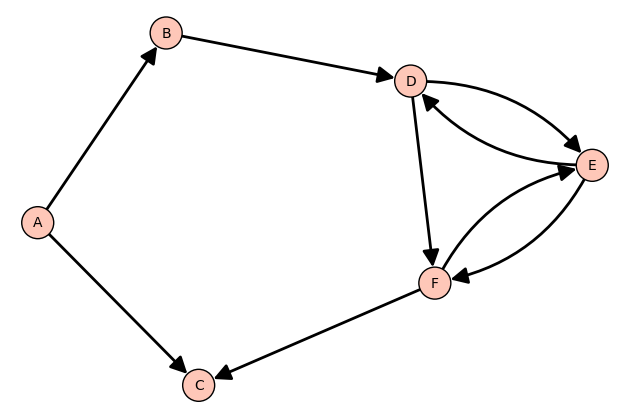

You should be able to tell that the `reachable(g0, 'B')` should return the set including all vertices except `'A'`.

In [ ]:
g0 = {
    'A': ['B', 'C'],
    'B': ['D',],
    'C': list(),
    'D': ['E',],
    'E': ['F',],
    'F': ['C', 'D'],
}

In [ ]:
b_set = reachable(g0, 'B')
assert type(b_set)==set, 'Error: The value returned by `reachable` is not a set!'
assert b_set=={'B', 'C', 'D', 'E', 'F'}, 'Error: The value returned by `reachable(g0, \'B\')` is not correct!'
print('Good job! The value returned by reachable(g0, \'B\') is correct.')

**Recommendation:** Check that your algorithm works correctly by running `reachable(g0, v)` for other values of `v`. Also try other directed graphs.

## 3. Sparse vector sum

A *sparse vector* is a vector most of whose entries are zero. Such a vector $v=(v_0, \ldots, v_{n-1}) \in \mathbb R^{n-1}$ can be efficiently represented as a dictionary `v_dict` with $i \in \{0, \ldots, n-1\}$ a key in `v_dict` whenever $v_i \neq 0$. The value assigned to `v_dict[i]` should be $v_i$.

Write a function `sparse_sum(v, w)` which takes as input two dictionaries representing vectors $v$ and $w$. The function should return dictionary representing $v+w$. The dictionary should have keys only for indices such that $(v+w)_i \neq 0$. You may likewise assume that neither input dictionary has zero as a value.

**Tests for your code:**

Here we let $v$ be a vector such that $v_1=2$ and $v_2=3$ and all other values are zero, and $w$ be a vector such that $w_1 = -5$ and $w_{100}=5$. Adding them should produce a vector $z$ such that $z_1=-3$, $z_2=3$ and $z_{100}=5$. All other entries should be zero.

In [ ]:
v = {1:  2,   2: 3}
w = {1: -5, 100: 5}
assert sparse_sum(v, w) == {1: -3, 2: 3, 100: 5}, 'The value of `sparse_sum(v, w)` is incorrect.'
print('Good job! The value you returned is correct.')

Here we test an example where the values are rational, and two pairs cancel.

In [ ]:
v = {4:  3/4, 18: -5/7,  27: -11/5}
w = {4: -3/4, 18: -17/7, 27:  11/5, 47: -16/3}
assert sparse_sum(v, w) == {18: -22/7, 47: -16/3}, 'The value of `sparse_sum(v, w)` is incorrect.'
print('Good job! The value you returned is correct.')

## 4. Base expansion of real number

Let $x \in [0, 1]$ be a real number and $b \geq 2$ be an integer. Then there is at least one sequence of numbers $\{a_i\}_{i \geq 0}$ with each $a_i \in \{0, \ldots, b-1\}$ such that
$$x = \sum_{i=0}^\infty \frac{a_i}{b^{i+1}}.$$
The sequence $\{a_i\}$ is the *expansion of $x$ in base $b$*.

Write a function `base_expansion(x, b, n)` that takes a numbers $x$ and $b$ as above and an $n \geq 0$ and returns the first $n$ terms in a base expansion for $x$ as a `list`. That is the function should return $[a_0, a_1, \ldots, a_{n-1}].$

**Tests for your code:**

We have $\frac{17}{20} = 0.85 = 0.849999\ldots$, so `base_expansion(17/20, 10, 3)` should return either `[8, 5, 0]` or `[8, 4, 9]`.

In [ ]:
your_answer = base_expansion(17/20, 10, 3)
assert type(your_answer)==list, 'You made an error: `base_expansion` should return a list.'
assert your_answer in ([8, 5, 0], [8, 4, 9]), 'The value returned by `base_expansion(17/20, 10, 3)` is incorrect.'
print('Good job! The value returned by `base_expansion(17/20, 10, 3)` is correct.')

A tricky special case is $1$. The base expansion in any base $b$ should be $[b-1, b-1, b-1, \ldots ]$. Here we check a few:

In [ ]:
for b in range(2, 7):
    your_answer = base_expansion(1, b, 10)
    correct_answer = 10 * [b-1]
    assert your_answer == correct_answer, f'The value returned by `base_expansion(1, {b}, 10)` is incorrect.'
print('Good job! The value returned by `base_expansion(1, b, 10)` was correct for b=2,3,4,5,6.')

You will want to create other tests to be sure your code works correctly, especially in other bases.

## 5. The Cantor ternary function

The Cantor function is a function $c:[0, 1] \to [0, 1]$ where $c(x)$ is determined as follows:

1. First we write the expansion of $x$ in base $3$ (*ternary*), giving an expansion $\{a_i\}_{i=0}^\infty$ with each $a_i \in \{0,1,2\}$ and $$x=\sum_{i=0}^\infty \frac{a_i}{3^{i+1}}.$$
2. Using the sequence $\{a_i\}$, we produce a new sequence $\{d_i\}$ with $d_i \in \{0, 1\}$ by executing the following steps for $i=0,1,2, \ldots$:
   * If $a_i=0$ we set $d_i=0$, and if $a_i \in \{1,2\}$, we set $d_i=1$.
   * If $a_i=1$, we stop (making $\{d_i\}$ just a finite sequence or equivalently declaring $d_j=0$ for $j>i$).
3. We define $c(x)=\sum \frac{d_i}{2^{i+1}}.$

You can read the [Encyclopedia of Mathematics article](https://encyclopediaofmath.org/wiki/Cantor_ternary_function) article if you want to learn more.

Write a function `cantor(x, n)` which takes as input an element $x \in [0,1]$ and returns an approximate of $c(x)$. To get the approximation, you should compute the first $n$ digits of the base $3$ expansion (using `base_expansion` from the previous problem), $[a_0, \ldots, a_{n-1}]$. Then apply the rules above to this finite list. The value returned should always be a rational number.

Plot the function sending `x` to `cantor(x, 10)` using [`line`](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/line.html) and at least 1000 points.

**Tests for your code:**

We have $c(1/2)=1/2$. Here we check this is the case:

In [ ]:
your_answer = cantor(1/2, 10)
assert your_answer in QQ, 'Your answer must be a rational number!'
assert your_answer == 1/2, 'Your answer to `cantor(1/2, 10)` is incorrect.'
print('Congratulations: Your answer to `cantor(1/2, 10)` is correct.')

We have $c(0)=0$. Here we check this is the case:

In [ ]:
your_answer = cantor(0, 10)
assert your_answer in QQ, 'Your answer must be a rational number!'
assert your_answer == 0, 'Your answer to `cantor(0, 10)` is incorrect.'
print('Congratulations: Your answer to `cantor(0, 10)` is correct.')

A bit trickier, we have $c(\frac{1}{4})=\frac{1}{3}$. (Why is that true?). Here we check this (noting that $\frac{1}{3}$ does not have an exact representation in binary):

In [ ]:
your_answer = cantor(1/4, 10)
assert your_answer in QQ, 'Your answer must be a rational number!'
assert abs(your_answer - 1/3) < 1/1000, 'Your answer to `cantor(0, 10)` is incorrect.'
print('Congratulations: Your answer to `cantor(0, 10)` is correct.')

## 6. Generalized Cantor functions

We will generalize the construction of the Cantor ternary function. Choose two bases $b_0 \geq 2$ and $b_1 \geq 2$. The base $b_0$ will be the input base, and $b_1$ the output base. The function $c(x)$ will also be determined by a dictionary $\tau$, which takes as input elements of $i \in \{0, 1, \ldots, b_0-1\}$ and outputs pairs `(digit_i, stop_i)` where `digit_i` is in $\{0, \ldots, b_1 - 1\}$ and `stop_i` is either `True` or `False`. The associated function $c(x)$ is produced by running the following process:
1. Define $\{a_i\}_{i=0}^{+\infty}$ to be the base $b_0$ expansion of $x$.
2. Using the sequence $\{a_i\}$, we produce a new sequence $\{d_i\}$ with $d_i \in \{0, 1, \ldots, b_1 - 1\}$ by executing the following steps for $i=0,1,2, \ldots$:
   * Set $d_i$ to be the first element of the pair $\tau[a_i]$.
   * If the second element of the pair $\tau[a_i]$ is true, we `STOP` (exiting the loop and declaring $d_j=0$ for $j>i$).
3. We define $c(x)=\sum \frac{d_i}{b_1^{i+1}}.$

The function $c$ can be approximated by starting in step $1$ with the first $n$ elements $[a_0, a_1, \ldots, a_{n-1}]$ of a base expansion for $x$ rather than the infinite base expansion. Then in the process we also `STOP` when $i$ becomes $n$.

Write a function `cantor_function(b0, b1, tau, n)` which takes as input bases `b0` and `b1`, a dictionary `tau` as above, and an integer $n \geq 1$ and returns a function $c_n(x)$. The returned function $c_n(x)$ should take as input a number $x \in [0,1]$ and return the approximation of $c(x)$ as defined above using a maximum of $n$ elements for the base expansion rather than the infinite expansion.

Some examples are discussed under *Tests* below. Plot these and others using either [`line`](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/line.html) or [`point`](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/point.html) and at least 1000 points. (`point` is probably more appropriate here since many of these functions are discontinuous. You might want to set `size=1` in your plot otherwise the size of points in the graph can make it hard to see the graph.)

**Tests for your code:**

This should give the Cantor ternary function again:

In [ ]:
tau_ctf = {
    0: (0, False),
    1: (1, True),
    2: (1, False),
}
ctf = cantor_function(3, 2, tau_ctf, 16)
assert callable(ctf), 'The returned value `ctf` should be a function!'
assert ctf(1/2)==1/2, 'The value `ctf(1/2)` should be `1/2`!'
assert ctf(0)==0, 'The value `ctf(0)` should be `0`!'
assert abs(ctf(1/4)-1/3)<1/500, 'The value `ctf(1/4)` should be nearly `1/3`!'
print('Good job! The returned value `ctf` of `cantor_function(3, 2, tau_ctf, 16)` passed the tests above.')

You should plot `ctf` to check that your function did give you the Cantor ternary function.

The following gives a right inverse for the Cantor ternary function. (Plotting will show you why.) That is, `ctf(ctf_inverse(x))` should be approximately $x$ for every $x$. (In the limit $n=+\infty$, the function really is a left inverse.)

In [ ]:
tau_ctf_inverse = {
    0: (0, False),
    1: (2, False)
}
ctf_inverse = cantor_function(2, 3, tau_ctf_inverse, 16)

Here we check that `ctf(ctf_inverse(x))` is close to $x$ for $x=\pi-3$.

In [ ]:
x = pi-3
assert abs(ctf(ctf_inverse(x))-x) < 1/1000, 'The value of `ctf(ctf_inverse(x))` is incorrect.'

Below is another example that seems interesting. Try to plot it using [`point`](https://doc.sagemath.org/html/en/reference/plotting/sage/plot/point.html).

In [ ]:
tau = {
    0: (0, False),
    1: (1, False),
    2: (0, False),
}
c = cantor_function(3, 2, tau, 10)

When I plotted this, I obtained a graph like the following (yours should be similar).
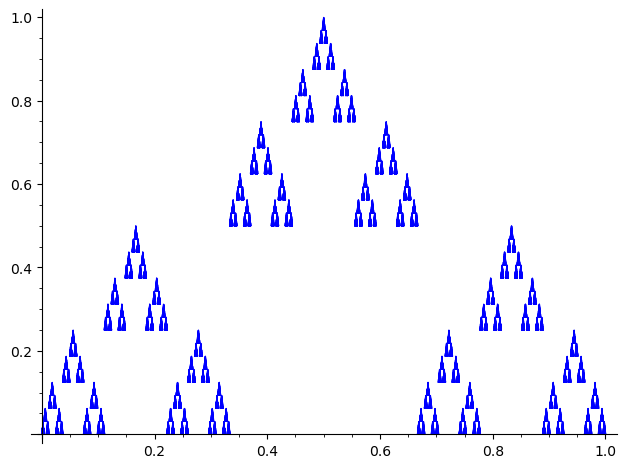